<a href="https://colab.research.google.com/github/Jugranada/Se-ales_sistemas/blob/main/Parcial_1_SYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Se dispone de un microprocesador de 5 bits con una entrada analógica en el rango de \(-3.3\) a \(5\,V\).

Se requiere diseñar el sistema de acondicionamiento y digitalización para la señal:

$$
x(t) = 20 \sin\left(7t - \frac{\pi}{2}\right) - 3 \cos(5t) + 2 \cos(10t)
$$

o equivalentemente,

$$
x(t) = -20 \cos(7t) - 3 \cos(5t) + 2 \cos(10t)
$$


Primero se grafica la señal sin ningún tipo de acondicionamiento, definida por:

$$
x(t) = -20 \cos(7t) - 3 \cos(5t) + 2 \cos(10t)
$$

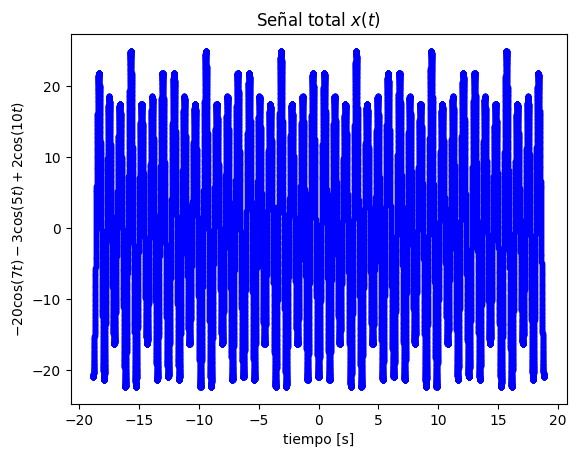

In [86]:
import numpy as np              # Importar la librería numpy para manejo de arrays y funciones matemáticas
import matplotlib.pyplot as plt # Importar matplotlib para graficar

# Parámetros de tiempo para la señal
T_total = 2 * np.pi            # Periodo fundamental de la señal compuesta
ti = -3*T_total                  # Tiempo inicial (empezamos 3 periodos atrás para mejor visualización)
tf = 3 * T_total               # Tiempo final (mostrar 3 periodos en total para observar repetición)
Fs = 1000                     # Frecuencia de muestreo en Hz (alta para buena resolución)
Ts = 1 / Fs                   # Periodo de muestreo (intervalo de tiempo entre muestras)
tv = np.arange(ti, tf, Ts)    # Vector de tiempo desde ti hasta tf con pasos Ts

# Construcción de la señal total sumando las 3 componentes con sus amplitudes y frecuencias
yv = -20 * np.cos(7 * tv) - 3 * np.cos(5 * tv) + 2 * np.cos(10 * tv)

# Graficar la señal total usando puntos azules
plt.plot(tv, yv, 'b.')
plt.xlabel('tiempo [s]')                      # Etiqueta eje x
plt.ylabel('$-20 \cos(7t) - 3 \cos(5t) + 2 \cos(10t)$')  # Etiqueta eje y con formato LaTeX
plt.title('Señal total $x(t)$')               # Título de la gráfica
plt.show()                                    # Mostrar la gráfica


Luego de observar la señal original, procedemos a acondicionarla con la funcion my_ceropen

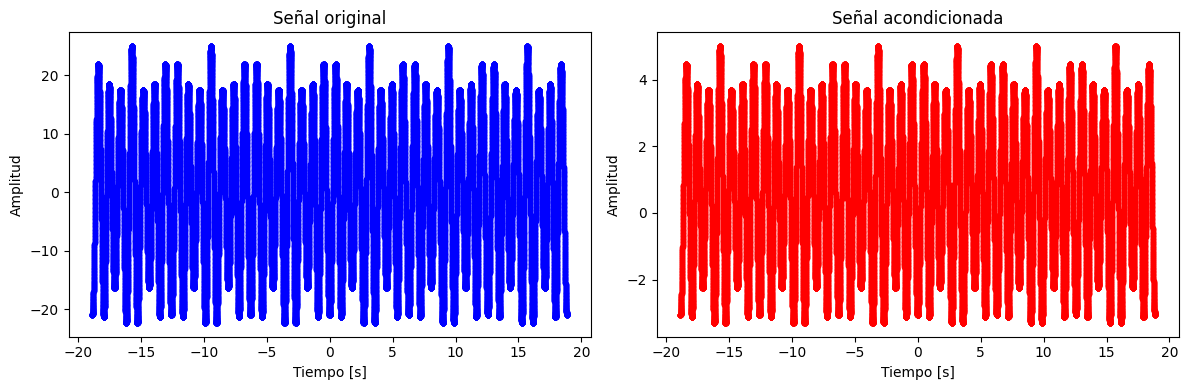

In [87]:
# Función para acondicionar la señal a un rango [ymin, ymax]
def my_ceropen(x, ymin, ymax):
    xmax = max(x)                      # Encontrar el valor máximo de la señal original
    xmin = min(x)                      # Encontrar el valor mínimo de la señal original
    m = (ymax - ymin) / (xmax - xmin) # Calcular la pendiente para escalar linealmente la señal
    c = ymin - m * xmin                # Calcular el intercepto para ajustar la señal al rango deseado
    yv = m * x + c                    # Aplicar la transformación lineal para acondicionar la señal
    return yv                         # Retornar la señal acondicionada

# Acondicionar la señal 'yv' para que esté en el rango [-3.3, 5]
yv_acond = my_ceropen(yv, ymin=-3.3, ymax=5)

# Crear una figura con 1 fila y 2 columnas de subplots para graficar lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Graficar la señal original en el primer subplot (axs[0])
axs[0].plot(tv, yv, 'b.')               # Graficar puntos de la señal original en color azul
axs[0].set_title('Señal original')      # Título del gráfico
axs[0].set_xlabel('Tiempo [s]')         # Etiqueta eje X
axs[0].set_ylabel('Amplitud')           # Etiqueta eje Y

# Graficar la señal acondicionada en el segundo subplot (axs[1])
axs[1].plot(tv, yv_acond, 'r.')         # Graficar puntos de la señal acondicionada en color rojo
axs[1].set_title('Señal acondicionada') # Título del gráfico
axs[1].set_xlabel('Tiempo [s]')         # Etiqueta eje X
axs[1].set_ylabel('Amplitud')           # Etiqueta eje Y

plt.tight_layout()  # Ajustar el espacio entre gráficos para que no se solapen etiquetas y títulos
plt.show()          # Mostrar la ventana con los gráficos



En este bloque se realiza la cuantización de la señal discretizada, asignando cada muestra al nivel más cercano definido por el número de bits del cuantizador. Luego se grafican la señal acondicionada, la discretizada, los niveles de cuantización y la señal digital resultante.

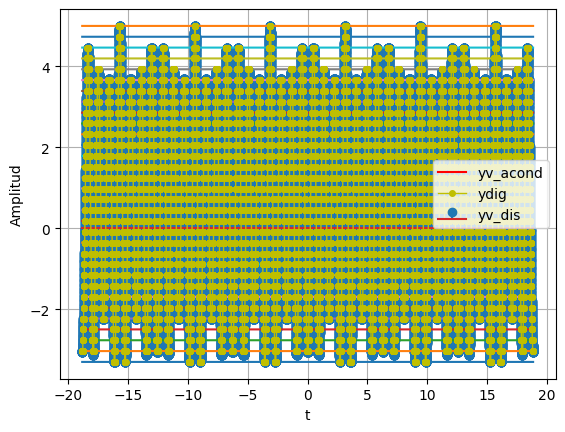

In [88]:
from scipy.spatial.distance import cdist  # para cálculo de distancias

# número de bits y vector de cuantización
nbits = 5                         # número de bits del cuantizador
rmin = -3.3                          # valor mínimo del rango
rmax = 5                         # valor máximo del rango
ve = np.linspace(rmin, rmax, 2**nbits)  # niveles de cuantización uniformemente espaciados

# función cuantización punto a punto
def my_cuantizador(yn, vq):  # yn: punto a cuantizar, vq: vector de estados
    Ne = vq.shape[0]         # tamaño del vector de estados
    dn = cdist(yn.reshape(-1,1), vq.reshape(-1,1))  # distancia entre yn y cada nivel (vectores columna)
    ind = np.argmin(dn)      # posición del valor más cercano (mínima distancia)
    return vq[ind]           # retornar valor cuantizado

# recorrer vector cero y spam discretizado para cuantizar
for i in range(yv_acond.shape[0]):  # recorrer cada muestra de la señal discretizada
    if i == 0:  # primera muestra
        yq = my_cuantizador(yv_acond[i], ve)  # cuantiza la primera muestra
    else:
        yq = np.append(yq, my_cuantizador(yv_acond[i], ve))  # apila muestras cuantizadas

# graficar señales

plt.plot(tv, yv_acond, c='r', label='yv_acond')  # señal continua (acondicionada)

plt.stem(tv, yv_acond, label='yv_dis')  # señal discretizada (muestras)

# estados de cuantización
for v in ve:
    plt.plot(tv, v*np.ones(len(tv)))  # líneas horizontales con cada nivel de cuantización

# graficar señal Digital (discreta + cuantizada)
plt.plot(tv, yq, c='y', marker='o', label='ydig', linewidth=1, markersize=4)  # señal digital final

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()


2. Se nos proporciona una señal analógica, continua en el tiempo, definida como:

$$
x(t) = 3 \cos(100 \pi t) + 5 \sin(2000 \pi t) + 10 \cos(11000 \pi t)
$$

Se solicita obtener su versión en tiempo discreto mediante un conversor análogo-digital con frecuencia de muestreo:

$$
f_s = 5\, \text{kHz}
$$

Las tareas a realizar son:

- Simular el proceso de muestreo (discretización en el tiempo) de la señal compuesta.

- Analizar si el proceso de muestreo es adecuado, es decir, si no se presenta aliasing o distorsión.

- En caso de que el proceso no sea adecuado, proponer y diseñar un mejor conversor con una frecuencia de muestreo mayor que minimice o elimine dichas distorsiones.


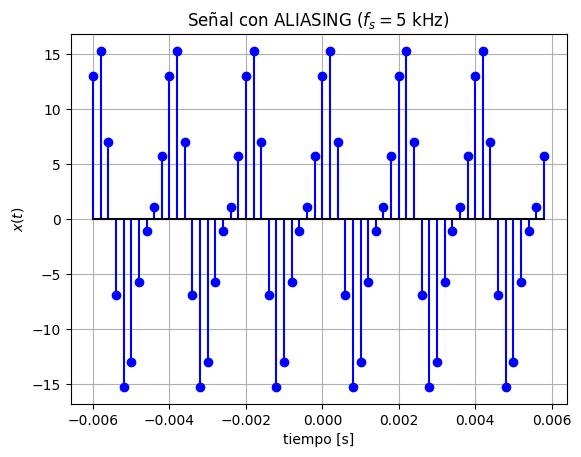

In [89]:
# Parámetros de tiempo para la señal
T_total = 0.002            # Periodo fundamental de la señal compuesta
ti = -3*T_total                  # Tiempo inicial (empezamos 3 periodos atrás para mejor visualización)
tf = 3 * T_total               # Tiempo final (mostrar 3 periodos en total para observar repetición)
Fs = 5000                     # Frecuencia de muestreo en Hz
Ts = 1 / Fs                   # Periodo de muestreo (intervalo de tiempo entre muestras)
tv = np.arange(ti, tf, Ts)    # Vector de tiempo desde ti hasta tf con pasos Ts

# Señal compuesta (frecuencias angulares)
yv = 3 * np.cos(1000 * np.pi * tv) + \
     5 * np.sin(2000 * np.pi * tv) + \
    10 * np.cos(11000 * np.pi * tv)

# Graficar la señal total usando puntos azules
plt.stem(tv, yv, basefmt="k-", linefmt='b', markerfmt='bo')
plt.xlabel('tiempo [s]')                      # Etiqueta eje x
plt.ylabel('$x(t)$')  # Etiqueta eje y con formato LaTeX
plt.title('Señal con ALIASING ($f_s = 5$ kHz)')               # Título de la gráfica
plt.grid(True)
plt.show()                                    # Mostrar la gráfica


La señal muestreada presenta aliasing, ya que la frecuencia de muestreo es menor al doble de la componente más alta de la señal (5500 Hz). Esto genera una distorsión visible, pérdida de la forma original y componentes falsas, haciendo que no sea posible reconstruir correctamente la señal. Por lo tanto, el conversor A/D utilizado no es adecuado para esta señal.

Para evitar el aliasing observado anteriormente, aumentamos la frecuencia de muestreo a 12 kHz, que cumple con el criterio de Nyquist (es mayor al doble de la frecuencia más alta de la señal, que es 5500 Hz). Esto permite una discretización precisa y una visualización clara de la señal original.

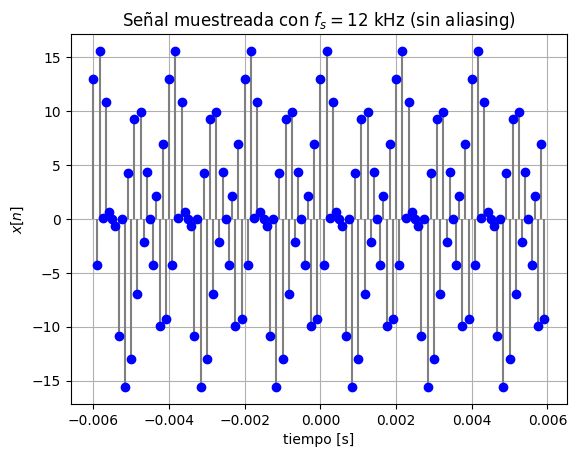

In [90]:
# Parámetros de tiempo
T_total = 0.002                 # Periodo total de visualización (2 ms = 1 periodo estimado de la señal compuesta)
ti = -3*T_total                          # Tiempo inicial
tf = 3*T_total                    # Tiempo final para visualizar 1 periodo
Fs = 12000                      # Nueva frecuencia de muestreo (Hz)
Ts = 1 / Fs                     # Periodo de muestreo
tv = np.arange(ti, tf, Ts)      # Vector de tiempo

# Construcción de la señal muestreada
yv = 3 * np.cos(1000 * np.pi * tv) + \
     5 * np.sin(2000 * np.pi * tv) + \
    10 * np.cos(11000 * np.pi * tv)

# Graficar señal muestreada
plt.stem(tv, yv, basefmt=" ", markerfmt='bo', linefmt='gray')  # Usar stem para representar discretización
plt.xlabel('tiempo [s]')
plt.ylabel('$x[n]$')
plt.title('Señal muestreada con $f_s = 12$ kHz (sin aliasing)')
plt.grid(True)
plt.show()

3. En este ejercicio se calcula la distancia media entre dos señales $x_1(t)$ y $x_2(t)$, que se define como la potencia media de la diferencia entre ellas; es decir, la potencia media del error.

$$
d(x_1, x_2) = \bar{P}_{x_1 - x_2} = \lim_{T \to \infty} \frac{1}{T} \int_T |x_1(t) - x_2(t)|^2 \, dt
$$

Consideramos dos señales periódicas de periodo fundamental $T$ definidas como:

$$
x_1(t) = A \cos(w_0 t), \quad w_0 = \frac{2\pi}{T}
$$

$$
x_2(t) = \left\{
\begin{array}{ll}
1 & 0 \leq t < \frac{T}{4} \\
-1 & \frac{T}{4} \leq t < \frac{3T}{4} \\
1 & \frac{3T}{4} \leq t < T
\end{array}
\right.
$$

El objetivo es determinar la distancia entre estas dos señales mediante el cálculo de la potencia media del error.


In [91]:
from sympy import symbols, cos, pi, integrate, simplify  # Importar funciones necesarias de sympy

# Declarar variables simbólicas
t, T, A = symbols('t T A', real=True, positive=True)  # t = tiempo, T = periodo, A = amplitud

# Definir la frecuencia angular w0 = 2π / T
w0 = 2 * pi / T

# Definir la señal x1(t) = A * cos(w0 * t)
x1 = A * cos(w0 * t)

# Tramo 1: x2(t) = 1  → e(t) = x1(t) - 1
e1 = (x1 - 1)**2
int1 = integrate(e1, (t, 0, T/4))  # Integrar el primer tramo de 0 a T/4

# Tramo 2: x2(t) = -1 → e(t) = x1(t) + 1
e2 = (x1 + 1)**2
int2 = integrate(e2, (t, T/4, 3*T/4))  # Integrar el segundo tramo de T/4 a 3T/4

# Tramo 3: x2(t) = 1  → e(t) = x1(t) - 1
e3 = (x1 - 1)**2
int3 = integrate(e3, (t, 3*T/4, T))  # Integrar el tercer tramo de 3T/4 a T

# Sumar todas las integrales
E_total = int1 + int2 + int3

# Dividir por T para obtener la potencia media
Pe = simplify(E_total / T)

# Mostrar resultado
print('La potencia media del error es:')
Pe


La potencia media del error es:


A**2/2 - 4*A/pi + 1

El resultado obtenido para la distancia media entre las señales $x_1(t)$ y $x_2(t)$ corresponde a la potencia media del error $\bar{P}_e$, dada por:

$$
\bar{P}_e = \frac{A^2}{2} - \frac{4A}{\pi} + 1
$$

Este valor representa cuánta diferencia hay, en promedio, entre las dos señales a lo largo del tiempo.  
Observamos que $\bar{P}_e$ depende de la amplitud $A$ de la señal senoidal $x_1(t)$, y que incluso si ambas señales tienen el mismo periodo, la forma de onda afecta significativamente su similitud.

Cuando $A$ se ajusta, la distancia cambia:  
- Si $A$ es muy pequeño o muy grande, $\bar{P}_e$ crece.
- Existe un valor óptimo de $A$ para el cual la distancia entre las señales es mínima.



4. En este ejercicio se analiza la segunda derivada de una señal periódica \( x(t) \), cuya forma se muestra en la Figura 1.  
Se busca demostrar que los coeficientes \( c_n \) de la serie exponencial de Fourier de \( x''(t) \), definidos en el intervalo \( [t_i, t_f] \), se pueden calcular como:

$$
c_n = \frac{1}{(t_i - t_f)\,n^2 \omega_0^2} \int_{t_i}^{t_f} x''(t)\, e^{-j n \omega_0 t} \, dt, \quad n \in \mathbb{Z}
$$

A partir de estos coeficientes, se construye el espectro de Fourier, incluyendo la magnitud, fase, parte real y parte imaginaria.  
También se evalúa el error relativo de reconstrucción de la señal \( x(t) \)
$$
n \in \{0, \pm 1, \pm 2, \pm 3, \pm 4, \pm 5\}
$$

Finalmente, se comprueba la validez del espectro calculado y la calidad de la reconstrucción a través de simulaciones realizadas en Python.




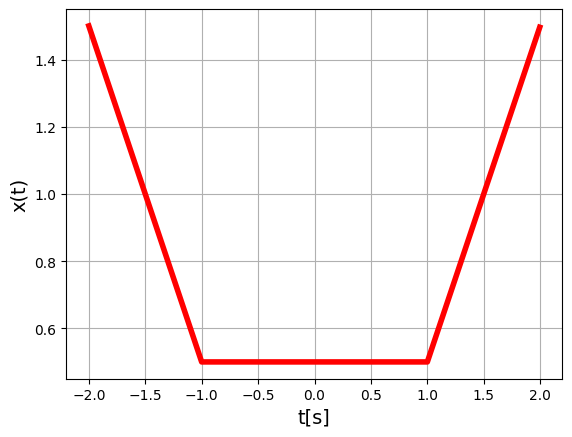

In [92]:
from ipywidgets import interact, IntSlider  # Importar herramientas para widgets interactivos
import numpy as np  # Importar biblioteca NumPy para manejo de vectores y operaciones matemáticas
import matplotlib.pyplot as plt  # Importar módulo para visualización de datos

A = 1      # Amplitud de la señal base
d2 = 2     # Extremo derecho del soporte de la señal
d1 = 1     # Extremo interno de la región plana

# Definir parámetros temporales
T = 2 * d2           # Duración total del intervalo de interés
Fo = 1 / T           # Frecuencia fundamental asociada a la señal
Fs = 1000 * Fo       # Frecuencia de muestreo, suficientemente alta
tv = np.arange(-T/2, T/2, 1/Fs)  # Vector de tiempos a muestrear
Nm = len(tv)         # Número total de muestras generadas

# Función que construye una señal trapezoidal
def funcion_trapecio(x, a, b, c, d):
    """
    Retorna una señal trapezoidal dada una base x y los puntos clave a, b, c, d.

    - x: vector de tiempo
    - a: inicio de la subida
    - b: inicio de la meseta
    - c: final de la meseta
    - d: final de la bajada
    """
    return np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))

# Construcción de la señal original, invertida y desplazada verticalmente
x = -funcion_trapecio(tv, -d2, -d1, d1, d2) + 1.5

# Visualización de la señal generada
plt.plot(tv, x, 'r', linewidth=4)
plt.grid()
plt.xlabel("t[s]", fontsize=14)
plt.ylabel("x(t)", fontsize=14)
plt.show()


En esta sección se calcula y grafica el espectro de Fourier de la señal $x(t)$ utilizando una base exponencial.  
Primero se define el conjunto de funciones base complejas $e^{j n \omega_0 t}$ para un número finito de armónicos $n \in [-N, N]$,  
y luego se calcula el espectro aproximado $C_n$ de la señal, utilizando una expresión analítica derivada de $x''(t)$.  

Finalmente, se visualiza el espectro en cuatro gráficos:  
- Parte real $\text{Re}\{C_n\}$  
- Parte imaginaria $\text{Im}\{C_n\}$  
- Magnitud $|C_n|$  
- Fase $\angle C_n$


In [93]:
N = 5  # Cantidad de armónicos considerados para la representación de la señal
wo = 2 * np.pi / T  # Cálculo de la frecuencia angular fundamental

# Inicialización de la matriz para almacenar las funciones base complejas
phin = np.zeros((Nm, 2 * N + 1), np.complex128)
for n in range(-N, N + 1, 1):
    phin[:, n + N] = np.exp(1j * n * wo * tv)  # Construcción de la base compleja de Fourier

# Definición del vector de armónicos y del vector de coeficientes espectrales
cn = np.zeros(2 * N + 1, np.complex128)
nv = np.linspace(-N, N, 2 * N + 1)

# Cálculo del espectro de Fourier con fórmula analítica basada en la derivada segunda
Cn = np.zeros_like(nv, dtype=np.complex128)
for i, n in enumerate(nv):
    if n != 0:
        Cn[i] = (2 * (np.cos(n * np.pi) - np.cos(n * np.pi * 0.5))) / (np.pi**2 * n**2)
    else:
        Cn[i] = 3 / 4  # Componente de frecuencia cero (DC)


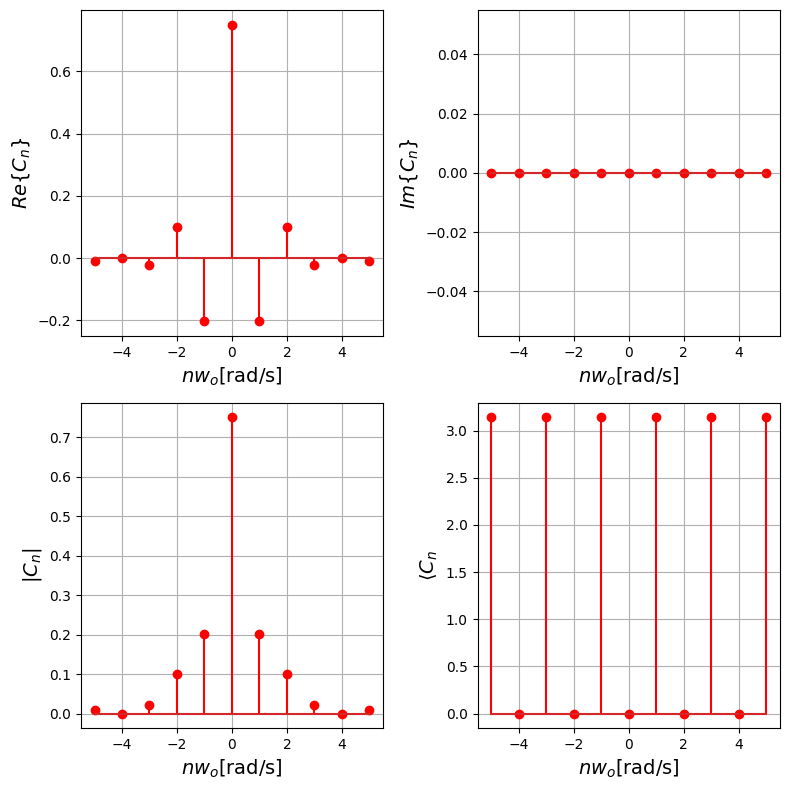

In [94]:
# Visualización del espectro estimado
fig = plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')  # Parte real de los coeficientes
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$Re\{C_n\}$', fontsize=14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')  # Parte imaginaria de los coeficientes
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$Im\{C_n\}$', fontsize=14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')  # Magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$|C_n|$', fontsize=14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')  # Fase del espectro
plt.xlabel(r'$nw_o$[rad/s]', fontsize=14)
plt.ylabel(r'$\langle C_n$', fontsize=14)
plt.axis('tight')
plt.grid()

fig.tight_layout()  # Ajuste automático del diseño del gráfico

Las Anteriores gráficas muestran el espectro de Fourier estimado para la señal $x(t)$ a partir de sus coeficientes exponenciales $C_n$:

- **Parte real $\text{Re}\{C_n\}$:**  
  Se observa simetría par respecto al eje vertical, lo cual indica que la señal es real. Los coeficientes negativos y positivos reflejan la forma simétrica de la señal original.

- **Parte imaginaria $\text{Im}\{C_n\}$:**  
  La parte imaginaria es prácticamente cero en todos los armónicos. Esto confirma que la señal original $x(t)$ es puramente real y que sus coeficientes de Fourier no contienen componente compleja significativa.

- **Magnitud $|C_n|$:**  
  La magnitud muestra qué tan presente está cada frecuencia armónica en la señal. La mayor concentración de energía está en los armónicos de orden bajo, decreciendo a medida que aumenta $|n|$.

- **Fase $\angle C_n$:**  
  La fase de los coeficientes tiene valores constantes para casi todos los armónicos no nulos, lo cual es consistente con la estructura de la señal derivada y su simetría temporal.


En esta parte del ejercicio se implementa la reconstrucción aproximada de la señal $x(t)$ utilizando una serie truncada de Fourier.  
Se calcula el error relativo $E_r$ comparando la energía de los coeficientes usados con la energía total estimada de la señal.  
Se visualiza la señal reconstruida junto a la señal original.  
Un deslizador interactivo permite modificar el número de armónicos considerados para observar cómo mejora la aproximación al aumentar $N_a$.


In [95]:
Px = 2/3  # Valor estimado de la potencia de la señal original (ajustar según análisis previo)

# Función interactiva para reconstrucción de la señal con N_a armónicos
def pltest(Na=1):
    ind = np.arange(N - Na, N + Na + 1)  # Índices de los armónicos considerados
    er = 1 - np.sum(abs(Cn[ind])**2) / Px  # Cálculo del error relativo de reconstrucción

    # Estimación de la señal mediante combinación lineal de las bases y coeficientes
    xe = phin[:, ind].dot(Cn[ind])  # Producto punto entre base y coeficientes

    # Graficar señal reconstruida y señal original
    plt.plot(tv, xe, color='b', label='$x_e(t)$')  # Señal estimada
    plt.plot(tv, x, color='r', label='x(t)')       # Señal original
    plt.title('$E_r$=%.2f[%%]' % (100 * er), fontsize=16)  # Mostrar error relativo en el título
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return

# Crear deslizador interactivo para elegir número de armónicos
interact(pltest, Na=(1, N, 1))


interactive(children=(IntSlider(value=1, description='Na', max=5, min=1), Output()), _dom_classes=('widget-int…

<function __main__.pltest(Na=1)>

Se observa que:

- Con pocos armónicos, la reconstrucción es más suave y no capta los detalles abruptos de la señal original.
- A medida que se incrementa $N_a$, la reconstrucción se ajusta más fielmente a la señal, especialmente en los bordes.
- El error relativo $E_r$ disminuye conforme se añaden más términos, indicando una mejora en la calidad de la aproximación.

Esta sección implementa una animación interactiva para visualizar cómo evoluciona la reconstrucción de la señal $x(t)$ a medida que se incrementa el número de armónicos utilizados.  

Para cada valor de $n$ (cantidad de armónicos considerados), se representan simultáneamente:
- La magnitud del espectro con los armónicos seleccionados en rojo.
- Las componentes reales e imaginarias de la combinación espectral.
- La señal original $x(t)$, la señal reconstruida $x_e(t)$ y el error de reconstrucción $e(t) = x(t) - x_e(t)$.

Esto permite observar gráficamente cómo se aproxima progresivamente la reconstrucción a la señal original, y cómo disminuye el error al considerar más armónicos.


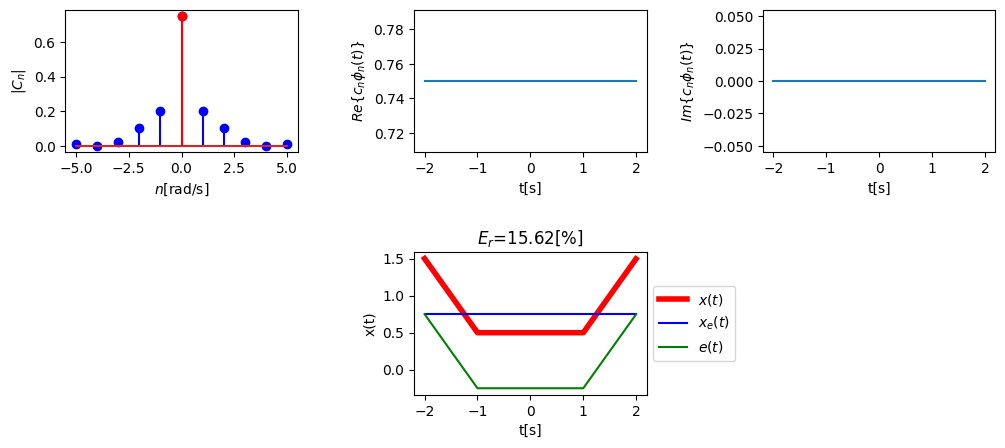

In [96]:
from matplotlib import animation, rc  # Importar módulo de animación de matplotlib
from IPython.display import HTML  # Herramienta para mostrar la animación en cuadernos

# Crear figura y ejes organizados en una grilla de 2x3 para la animación
fig, ax = plt.subplots(2, 3, figsize=(12, 5))

# Definir función que actualiza el contenido de la animación en cada cuadro
def update(n):
    # Limpiar todos los ejes antes de redibujar
    ax[0,0].clear()
    ax[0,1].clear()
    ax[0,2].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    # Armónicos considerados en el espectro actual
    ind = np.arange(N - n, N + n + 1)

    # Mostrar magnitud del espectro completo y en rojo los armónicos seleccionados
    ax[0,0].stem(nv, abs(Cn), 'b')  # Espectro completo
    ax[0,0].stem(nv[ind], abs(Cn[ind]), 'r')  # Armónicos seleccionados
    ax[0,0].set_xlabel(r'$n$[rad/s]')
    ax[0,0].set_ylabel(r'$|C_n|$')

    # Calcular combinación lineal de las bases con sus coeficientes espectrales
    ce = phin[:, ind].dot(np.diag(Cn[ind]))

    # Mostrar componente real de la combinación espectral
    ax[0,1].plot(tv, np.real(ce))
    ax[0,1].set_xlabel('t[s]')
    ax[0,1].set_ylabel('$Re\{c_n\\phi_n(t)\}$')

    # Mostrar componente imaginaria de la combinación espectral
    ax[0,2].plot(tv, np.imag(ce))
    ax[0,2].set_xlabel('t[s]')
    ax[0,2].set_ylabel('$Im\{c_n\\phi_n(t)\}$')

    # Calcular señal reconstruida y error
    er = 1 - np.sum(abs(Cn[ind])**2) / Px
    xe = phin[:, ind].dot(Cn[ind])  # Reconstrucción
    et = x - xe  # Error entre señal original y reconstruida

    # Graficar señal original, reconstruida y el error
    ax[1,1].plot(tv, x, 'r', linewidth=4, label='$x(t)$')
    ax[1,1].plot(tv, xe, color='b', label='$x_e(t)$')
    ax[1,1].plot(tv, et, color='g', label='$e(t)$')
    ax[1,1].set_title('$E_r$=%.2f[%%]' % (100 * er))
    ax[1,1].set_xlabel('t[s]')
    ax[1,1].set_ylabel('x(t)')
    ax[1,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Ocultar los dos ejes vacíos restantes
    ax[1,0].axis('off')
    ax[1,2].axis('off')

    # Ajustar espacio entre subgráficas
    plt.subplots_adjust(wspace=0.5, hspace=0.7)
    plt.show()

# Crear y configurar animación para visualizar la reconstrucción armónica paso a paso
anim = animation.FuncAnimation(fig, update, frames=np.arange(0, N + 1, 1), blit=False)
rc('animation', html='jshtml')


In [97]:
anim  # Mostrar la animación generada en el entorno del cuaderno

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

A lo largo de este ejercicio se desarrolló el análisis espectral de una señal periódica a partir de su segunda derivada, utilizando la serie exponencial de Fourier.  
Se obtuvieron expresiones analíticas para los coeficientes $C_n$ y se representaron sus componentes: parte real, imaginaria, magnitud y fase.

Posteriormente, se reconstruyó la señal original $x(t)$ empleando un número finito de armónicos, lo que permitió analizar el comportamiento del error relativo de reconstrucción $E_r$ en función de la cantidad de términos utilizados.  
También se visualizó gráficamente el efecto de cada armónico en la aproximación mediante animación.

Este ejercicio permitió comprender cómo la información espectral se distribuye en los coeficientes de Fourier y cómo la cantidad de armónicos afecta la fidelidad de la reconstrucción, reforzando conceptos clave del análisis de señales en el dominio de la frecuencia.
